<a href="https://colab.research.google.com/github/Atomao/simple-cnn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-05-18 10:59:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   203MB/s    in 0.5s    

2022-05-18 10:59:17 (203 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os 


for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"dirs {len(dirnames)}, files {len(filenames)} ,  path {dirpath}")

dirs 2, files 0 ,  path pizza_steak
dirs 2, files 0 ,  path pizza_steak/train
dirs 0, files 750 ,  path pizza_steak/train/pizza
dirs 0, files 750 ,  path pizza_steak/train/steak
dirs 2, files 0 ,  path pizza_steak/test
dirs 0, files 250 ,  path pizza_steak/test/pizza
dirs 0, files 250 ,  path pizza_steak/test/steak


In [ ]:
import pathlib

import numpy as np


data_dir = pathlib.Path('pizza_steak/train')

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"image shape {img.shape}")
  return img


  

['467986.jpg']
image shape (512, 512, 3)


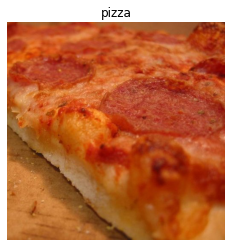

In [ ]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[156,  79,  27],
        [155,  78,  26],
        [156,  74,  24],
        ...,
        [100,  41,  23],
        [100,  43,  26],
        [ 97,  41,  26]],

       [[158,  78,  27],
        [157,  75,  25],
        [156,  73,  23],
        ...,
        [100,  37,  19],
        [100,  39,  21],
        [ 99,  40,  22]],

       [[158,  74,  27],
        [158,  72,  25],
        [157,  69,  23],
        ...,
        [106,  40,  16],
        [103,  37,  15],
        [103,  38,  18]],

       ...,

       [[176, 106,  46],
        [175, 105,  45],
        [174, 104,  44],
        ...,
        [181, 112,  43],
        [179, 110,  41],
        [178, 109,  40]],

       [[174, 104,  44],
        [173, 103,  43],
        [172, 102,  42],
        ...,
        [181, 112,  43],
        [179, 110,  41],
        [177, 108,  39]],

       [[169,  99,  39],
        [169,  99,  39],
        [168,  98,  38],
        ...,
        [181, 112,  4

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(39)

train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32,
                                               target_size = (224, 224), class_mode = 'binary',
                                               seed = 39)

valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size = 32,
                                               target_size = (224, 224), class_mode = 'binary',
                                               seed = 39)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters = 10,
                                                    kernel_size = 3,
                                                    activation = 'relu',
                                                    input_shape = (224, 224, 3)),
                              tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
                              tf.keras.layers.MaxPool2D(pool_size = 2,
                                                        padding = 'valid'),
                              tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                              tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                              tf.keras.layers.MaxPooling2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

hist = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                   validation_data = valid_data, validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 244ms/step - loss: 0.5589 - accuracy: 0.7053 - val_loss: 0.3769 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4354 - accuracy: 0.8153 - val_loss: 0.3561 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3705 - accuracy: 0.8500 - val_loss: 0.3011 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3360 - accuracy: 0.8613 - val_loss: 0.2872 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2938 - accuracy: 0.8793 - val_loss: 0.2840 - val_accuracy: 0.8860


In [ ]:
#Create and fit model without cnn layers
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 236ms/step - loss: 4.2035 - accuracy: 0.5987 - val_loss: 1.1951 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 1.0027 - accuracy: 0.6747 - val_loss: 0.7617 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5880 - accuracy: 0.7393 - val_loss: 0.4599 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5126 - accuracy: 0.7680 - val_loss: 0.4386 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5445 - accuracy: 0.7547 - val_loss: 0.4256 - val_accuracy: 0.8040


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['838344.jpg']
image shape (512, 512, 3)
['2606727.jpg']
image shape (512, 512, 3)


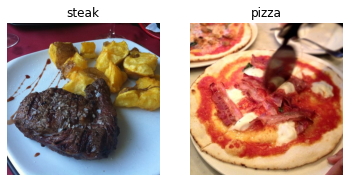

In [ ]:
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
!nvidia-smi

Wed May 18 11:01:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32) 
valid_data = valid_datagen.flow_from_directory(test_dir, 
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32) 

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images , labels = train_data.next()

In [ ]:
len(images)

32

In [ ]:
images[0], images[0].shape

(array([[[0.7176471 , 0.36078432, 0.13725491],
         [0.69803923, 0.34901962, 0.12941177],
         [0.7411765 , 0.38823533, 0.18039216],
         ...,
         [0.7411765 , 0.6862745 , 0.63529414],
         [0.73333335, 0.68235296, 0.61960787],
         [0.73333335, 0.68235296, 0.61960787]],
 
        [[0.65882355, 0.3019608 , 0.12941177],
         [0.7254902 , 0.3803922 , 0.20000002],
         [0.69803923, 0.3529412 , 0.15686275],
         ...,
         [0.7372549 , 0.6862745 , 0.62352943],
         [0.7372549 , 0.6862745 , 0.62352943],
         [0.7254902 , 0.6745098 , 0.6117647 ]],
 
        [[0.6901961 , 0.32941177, 0.18431373],
         [0.7254902 , 0.36862746, 0.19607845],
         [0.7019608 , 0.36078432, 0.15294118],
         ...,
         [0.7411765 , 0.6901961 , 0.627451  ],
         [0.7411765 , 0.6901961 , 0.627451  ],
         [0.7254902 , 0.6745098 , 0.6117647 ]],
 
        ...,
 
        [[0.68235296, 0.6784314 , 0.6627451 ],
         [0.68235296, 0.6784314 , 0.66274

In [ ]:
labels

array([1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [ ]:
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size= 3,
                             strides =1,
                             padding = 'valid',
                             activation = 'relu',
                             input_shape= (224, 224, 3)),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation = 'relu'),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])




In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data, epochs = 5, steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 264ms/step - loss: 0.9490 - accuracy: 0.7113 - val_loss: 0.4213 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4325 - accuracy: 0.8080 - val_loss: 0.3885 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.2999 - accuracy: 0.8867 - val_loss: 0.4011 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1547 - accuracy: 0.9493 - val_loss: 0.5716 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.0589 - accuracy: 0.9847 - val_loss: 0.5539 - val_accuracy: 0.7900


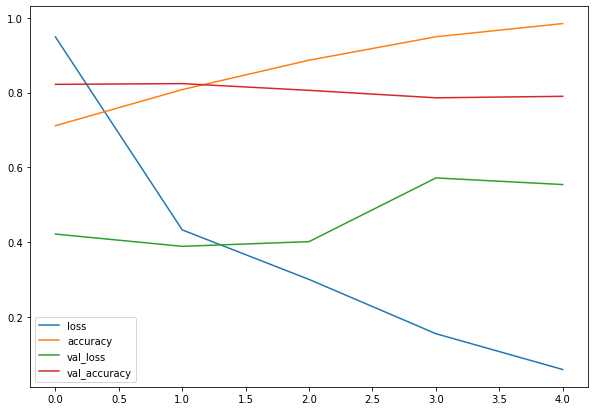

In [ ]:
import pandas as pd


pd.DataFrame(history_4.history).plot(figsize= (10, 7))

In [ ]:
history_4.history

{'accuracy': [0.7113333344459534,
  0.8080000281333923,
  0.8866666555404663,
  0.9493333101272583,
  0.984666645526886],
 'loss': [0.948981761932373,
  0.4324771463871002,
  0.2999159097671509,
  0.1547265499830246,
  0.05887638404965401],
 'val_accuracy': [0.8220000267028809,
  0.8240000009536743,
  0.8059999942779541,
  0.7860000133514404,
  0.7900000214576721],
 'val_loss': [0.42130962014198303,
  0.3885239064693451,
  0.4010877311229706,
  0.5715552568435669,
  0.5539070963859558]}

In [ ]:
tf.random.set_seed(39)

model_5 = Sequential([
                      Conv2D(filters = 10, kernel_size = (3, 3),
                             activation = 'relu',input_shape = (224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters = 10, kernel_size = (3, 3),
                             activation = 'relu'),
                      MaxPool2D(pool_size = (2, 2)),
                      Conv2D(10, (3, 3), activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

In [ ]:
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

model_5.fit(train_data,
            epochs = 5, 
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.6173 - accuracy: 0.6660 - val_loss: 0.4670 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4413 - accuracy: 0.7940 - val_loss: 0.3400 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3898 - accuracy: 0.8333 - val_loss: 0.3247 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3910 - accuracy: 0.8340 - val_loss: 0.3480 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3650 - accuracy: 0.8467 - val_loss: 0.2967 - val_accuracy: 0.8860


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
def view_and_predict_random_image(target_dir, model, i):
  random_class = random.choice(os.listdir(target_dir))
  target_folder = target_dir + random_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  image_tensor = tf.image.resize(tf.expand_dims(tf.constant(img), axis=0), size = (224,224))
  preds = model.predict(image_tensor)
  pred_label = 'steak' if preds[0][0] > 0.5  else 'pizza'
  plt.figure(i)
  plt.imshow(img )
  plt.title(f"True: {random_class}\nPredicted: {pred_label} ")
  plt.axis('off')

  print(f"image shape {img.shape}")



Model 1
image shape (384, 512, 3)
Model 3
image shape (512, 512, 3)
Model 4
image shape (512, 512, 3)
Model 5
image shape (512, 512, 3)


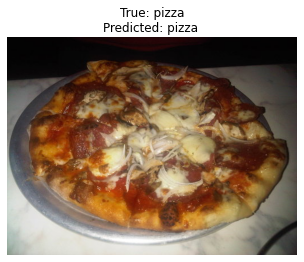

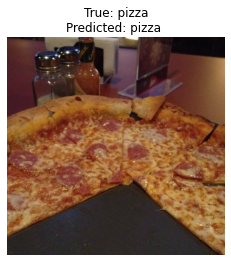

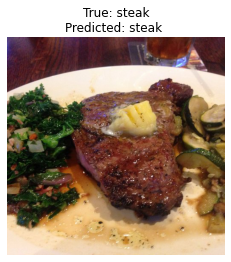

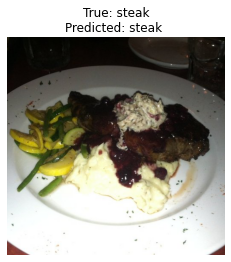

In [ ]:
models = {'Model 1': model_1,
          'Model 3': model_3,
          'Model 4': model_4,
          'Model 5': model_5}
i = 0
for name, model in models.items():
  print(name)
  
  view_and_predict_random_image('pizza_steak/train/', model, i)
  i+=1
